In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline #import libraries

In [2]:
d1=pd.read_csv('fraudtrain.csv')
d1.head(10) #import train data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [3]:
d2=pd.read_csv('fraudtest.csv')
d2.head(10) #import test data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [4]:
d1.info() #info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
d2.info() #info about test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
d1.duplicated().sum() #check duplicates

0

In [7]:
d2.duplicated().sum() #check duplicates

0

In [8]:
d1.isnull().sum() #check null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
d2.isnull().sum() #check null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
d1.nunique() #no of unique columns

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [11]:
d2.nunique() #no of unique columns

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [12]:
d1.corr() #correlated relationships

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


In [13]:
d2.corr() #correlated relationships

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892
cc_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060


<Axes: >

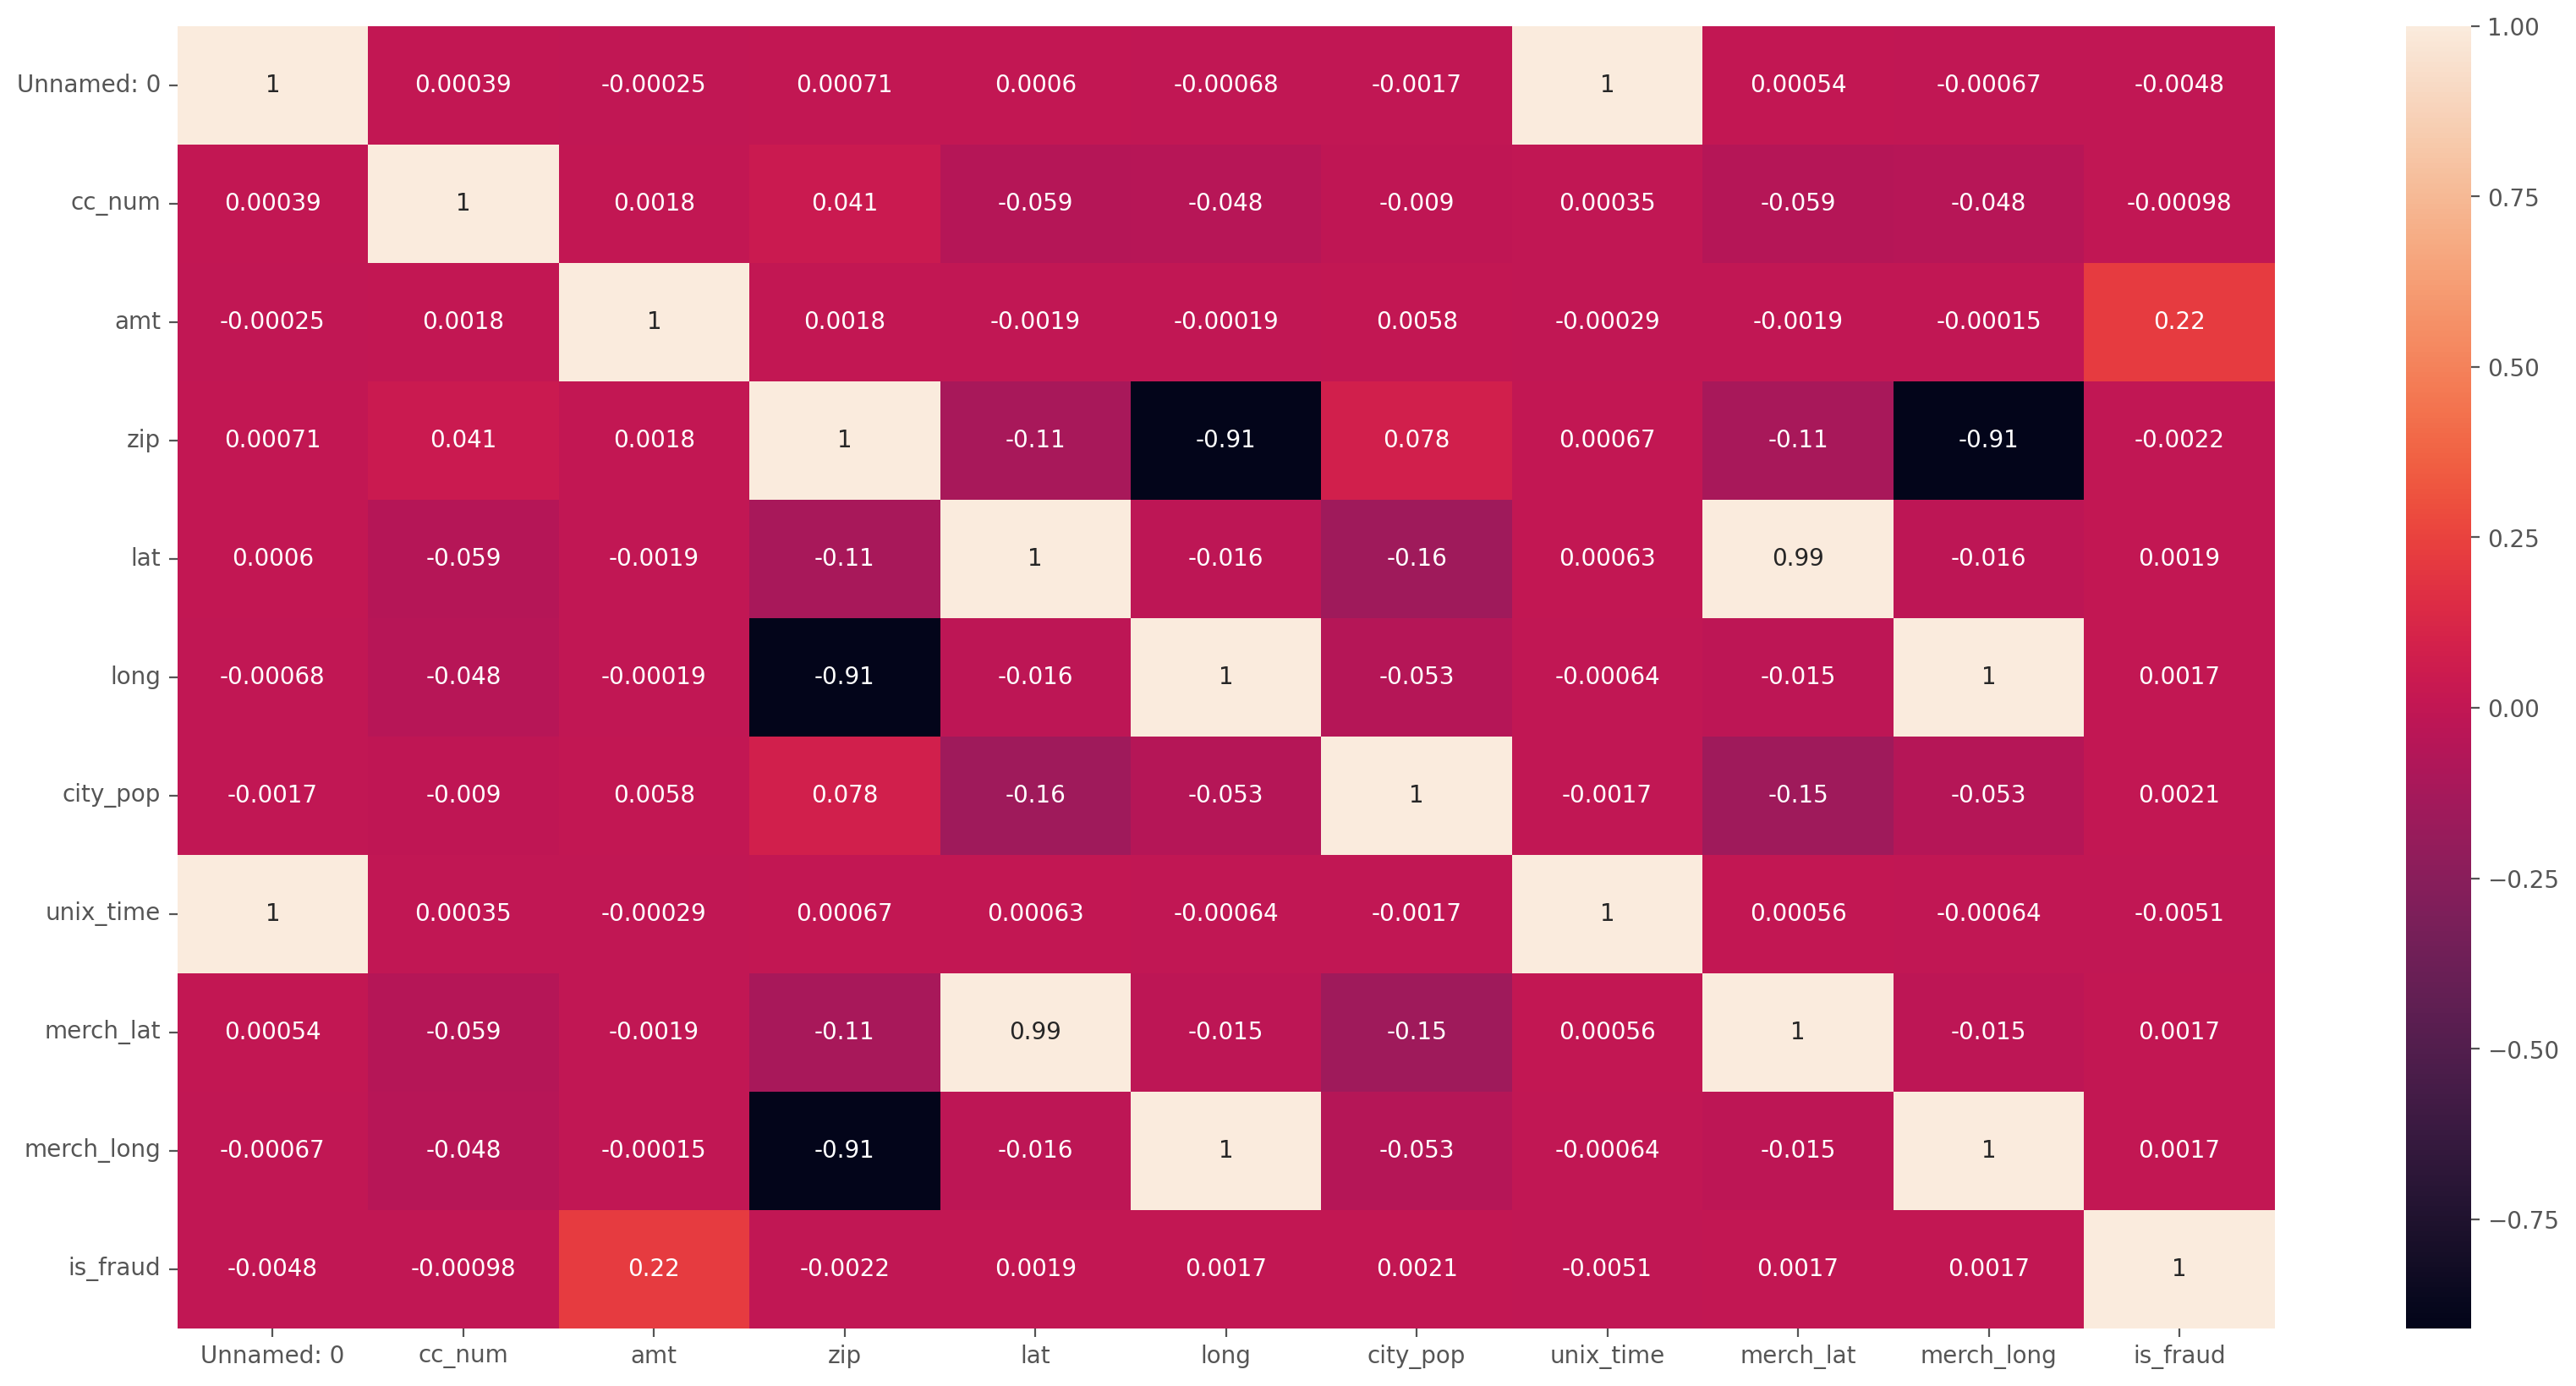

In [14]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(d1.corr(),annot=True) #heatmap

<Axes: >

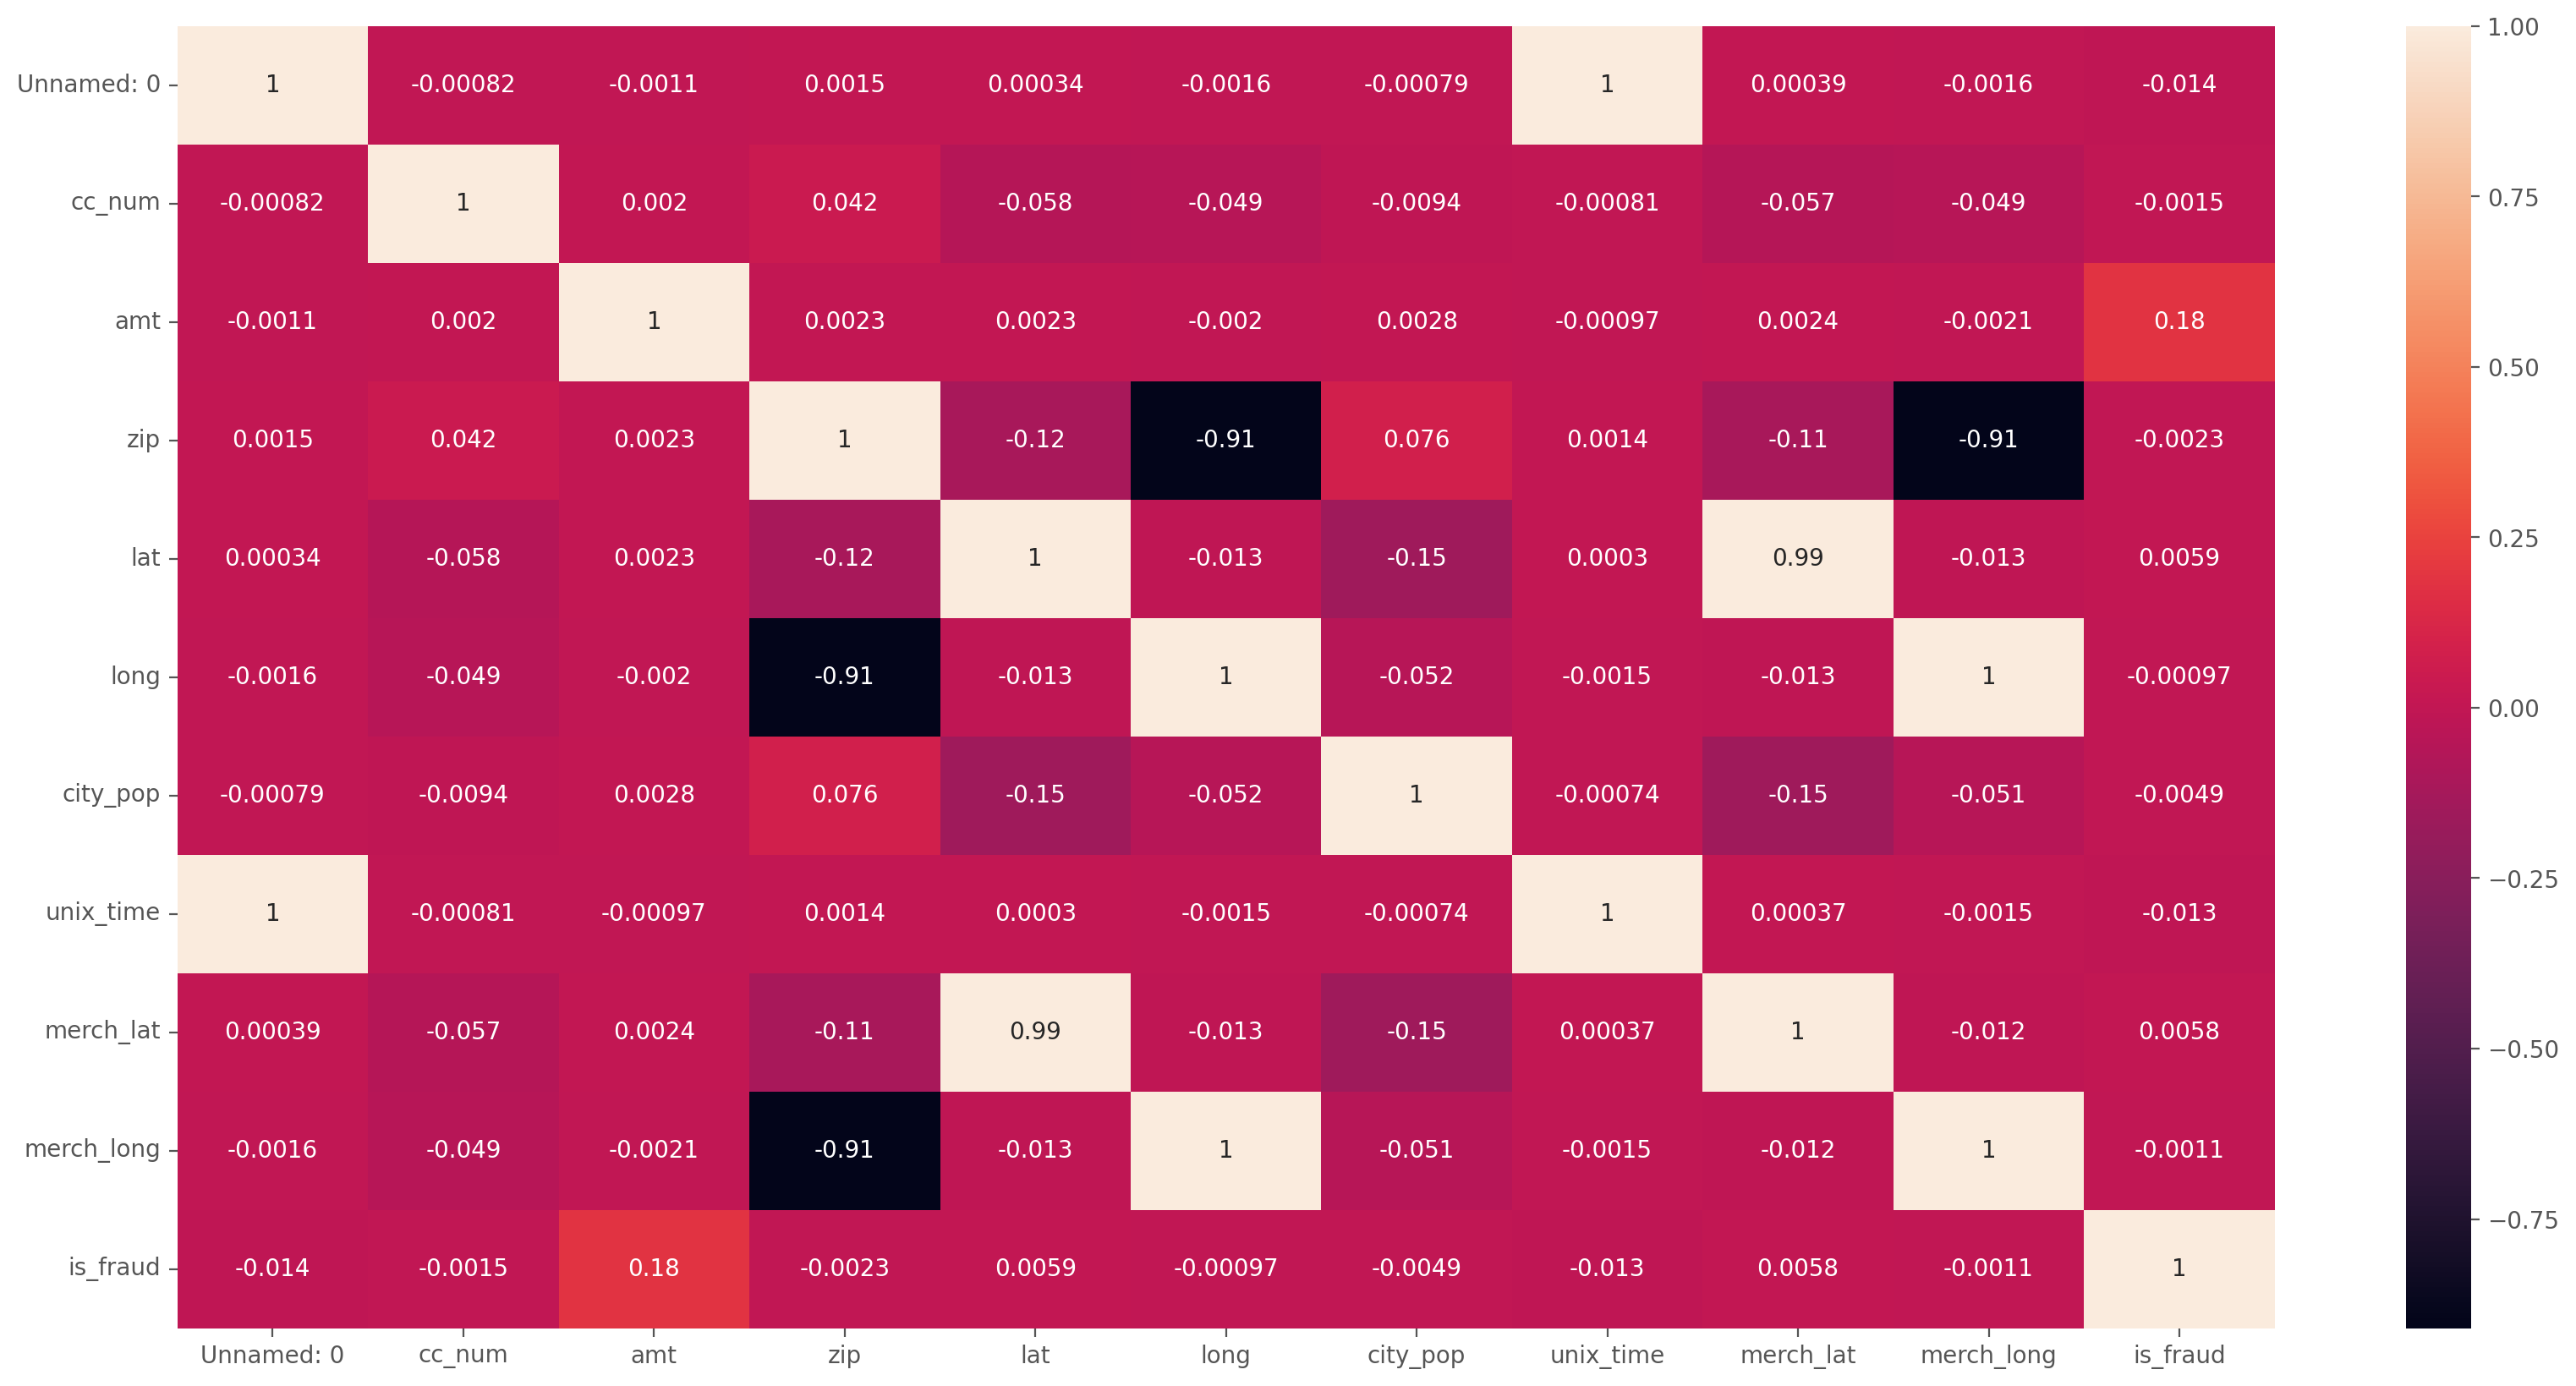

In [15]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(d2.corr(),annot=True) #heatmap

In [17]:
d=pd.merge(d1,d2,left_on='Unnamed: 0',right_on='Unnamed: 0',how='inner') #merge both dataset

In [19]:
d.head(10) #show columns

,Unnamed: 0,trans_date_trans_time_x,cc_num_x,merchant_x,category_x,amt_x,first_x,last_x,gender_x,street_x,...,lat_y,long_y,city_pop_y,job_y,dob_y,trans_num_y,unix_time_y,merch_lat_y,merch_long_y,is_fraud_y
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [20]:
cols=['amt_x','category_x','gender_x','city_pop_y','merch_lat_y','merch_long_y','job_y']
X=d[cols]
Y=d[['is_fraud_y']]#dependent and independent features

In [21]:
X.head() #top rows

,amt_x,category_x,gender_x,city_pop_y,merch_lat_y,merch_long_y,job_y
0,4.97,misc_net,F,333497,33.986391,-81.200714,Mechanical engineer
1,107.23,grocery_pos,F,302,39.450498,-109.960431,"Sales professional, IT"
2,220.11,entertainment,M,34496,40.495810,-74.196111,"Librarian, public"
3,45.00,gas_transport,M,54767,28.812398,-80.883061,Set designer
4,41.96,misc_pos,M,1126,44.959148,-85.884734,Furniture designer


In [22]:
Y.head() #tp rows od dependent features 

,is_fraud_y
0,0
1,0
2,0
3,0
4,0


In [23]:
#Splitting The Data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [24]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)#data shape

Training Data Shape   :  (444575, 7)
Training Labels Shape :  (444575, 1)
Testing Data Shape    :  (111144, 7)
Testing Labels Shape  :  (111144, 1)


In [26]:
cols = ['category_x','gender_x','job_y']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit on the training set
encoder.fit(x_train[cols])

# Transforming training and test sets
x_train[cols] = encoder.transform(x_train[cols])
x_test[cols] = encoder.transform(x_test[cols])

In [27]:
x_train.head()  #train data first few columns

,amt_x,category_x,gender_x,city_pop_y,merch_lat_y,merch_long_y,job_y
171859,9.50,8.0,0.0,22305,39.137208,-83.528177,444.0
129424,50.48,2.0,1.0,1523,34.969408,-81.875062,383.0
42744,39.66,7.0,0.0,804,38.727242,-74.492122,238.0
485643,7.81,12.0,0.0,606,36.332956,-105.802128,425.0
222124,2.29,6.0,1.0,3032,42.461457,-93.831585,95.0


In [28]:
x_test.head() #test data first few columns

,amt_x,category_x,gender_x,city_pop_y,merch_lat_y,merch_long_y,job_y
242946,94.49,0.0,1.0,895,47.845428,-117.893899,86.0
484752,36.11,9.0,1.0,178,32.843589,-99.063231,471.0
25823,64.46,5.0,0.0,14742,26.641414,-81.177129,440.0
547576,56.24,7.0,0.0,4729,36.614875,-83.922968,205.0
425303,41.16,1.0,1.0,4471,33.132870,-80.281656,302.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
classifier.fit(x_train, y_train)

pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)#1st model

In [32]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training set accuracy : ',accuracy_score(y_train,pred_train))
print('Testing set accuracy : ',accuracy_score(y_test,pred_test)) #model score

Training set accuracy :  0.9963020862621604
Testing set accuracy :  0.9963740732743108


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', max_depth = 10)
classifier.fit(x_train, y_train)#2nd model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30)

In [34]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training set accuracy : ',accuracy_score(y_train,pred_train))
print('Testing set accuracy : ',accuracy_score(y_test,pred_test)) #model score

Training set accuracy :  0.9961378844964291
Testing set accuracy :  0.9963470812639459


In [35]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(estimator, n_estimators = 20)
classifier.fit(x_train, y_train)#3rd model

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5),
                   n_estimators=20)

In [ ]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training set accuracy : ',accuracy_score(y_train,pred_train))
print('Testing set accuracy : ',accuracy_score(y_test,pred_test)) #model score